In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [5]:
# Create a Model Class that inherit nn.Modules
class Model(nn.Module):
  # Input layer (4 feature of flower)
  # Hidden layer1 ()
  # Hidden leye 2
  # Output: 3 class
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()

    # các hàm tính ra z
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    # các hàm kích hoạt tính ra a
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [6]:
# Pick a manual seed for random
torch.manual_seed(41)

# create an instance
model = Model()

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [19]:
# Bien cot cuoi thanh so float
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)


In [20]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [21]:
# Train test split
X = my_df.drop('species',axis=1)
y = my_df['species']

In [25]:
# Chuyển thành mảng numpy
X = X.values
y = y.values

# Đã chuyển rồi thì chạy lỗi =))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [30]:
# chuyen sang dang float tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# chuyen sang dang long tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
# model dự đoán lỗi
criterion  = nn.CrossEntropyLoss()
# adam optimizer, lr = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [33]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>


In [34]:
# train
# epoch = 100

epochs =100
losses =[]

for i in range(epochs):
  #
  y_pred = model.forward(X_train)

  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy()) # chuyen tu tensor sang numpy
  if i % 10 ==0:

    print(f'epoch: {i} loss: {loss}')

  # back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 1.1251550912857056
epoch: 10 loss: 1.0096259117126465
epoch: 20 loss: 0.8157405853271484
epoch: 30 loss: 0.585706353187561
epoch: 40 loss: 0.3999636471271515
epoch: 50 loss: 0.26768800616264343
epoch: 60 loss: 0.17942361533641815
epoch: 70 loss: 0.12151690572500229
epoch: 80 loss: 0.0860118493437767
epoch: 90 loss: 0.06520850956439972


Text(0.5, 0, 'epoch')

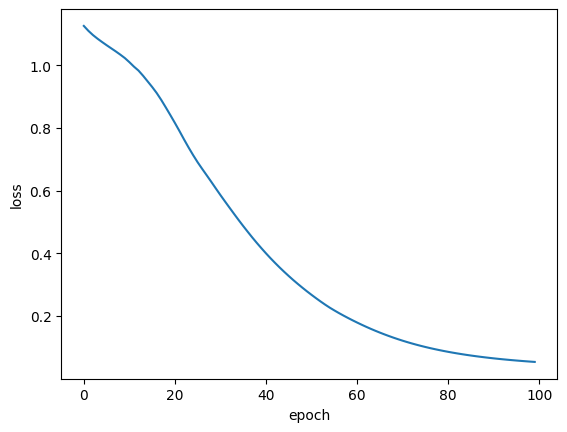

In [35]:
# bieu do
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')